In [0]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import numpy
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
numpy.random.seed(10)

In [0]:
from google.colab import files
uploaded = files.upload()

Saving train.xls to train (7).xls


In [0]:
from google.colab import files
uploaded1 = files.upload()

Saving test.xls to test (6).xls


In [0]:
filepath="train.xls"
filepath1="test.xls"
train_df = pd.read_excel(filepath)
test_df = pd.read_excel(filepath1)

In [0]:
col=['Survived','PassengerId','Name','Pclass' ,'Sex', 'Age', 'SibSp',
      'Parch', 'Fare', 'Embarked']
col_1=['PassengerId','Name','Pclass' ,'Sex', 'Age', 'SibSp',
      'Parch', 'Fare', 'Embarked']
train_df=train_df[col]
test_df=test_df[col_1]

In [0]:
def PreprocessData(raw_df):
    df=raw_df.drop(['PassengerId'], axis=1)
    df=raw_df.drop(['Name'], axis=1)
    age_mean = df['Age'].mean()
    df['Age'] = df['Age'].fillna(age_mean)
    fare_mean = df['Fare'].mean()
    df['Fare'] = df['Fare'].fillna(fare_mean)
    df['Sex']= df['Sex'].map({'female':0, 'male': 1}).astype(int)
    x_OneHot_df = pd.get_dummies(data=df,columns=["Embarked" ])

    ndarray = x_OneHot_df.values
    Features = ndarray[:,1:]
    Label = ndarray[:,0]

    minmax_scale = preprocessing.MinMaxScaler(feature_range=(0, 1))
    scaledFeatures=minmax_scale.fit_transform(Features)    
    
    return scaledFeatures,Label

In [0]:
def PreprocessData1(raw_df):
    df=raw_df.drop(['PassengerId'], axis=1)
    df=raw_df.drop(['Name'], axis=1)
    age_mean = df['Age'].mean()
    df['Age'] = df['Age'].fillna(age_mean)
    fare_mean = df['Fare'].mean()
    df['Fare'] = df['Fare'].fillna(fare_mean)
    df['Sex']= df['Sex'].map({'female':0, 'male': 1}).astype(int)
    x_OneHot_df = pd.get_dummies(data=df,columns=["Embarked" ])

    ndarray = x_OneHot_df.values
    Features = ndarray

    minmax_scale = preprocessing.MinMaxScaler(feature_range=(0, 1))
    scaledFeatures=minmax_scale.fit_transform(Features)    
    
    return scaledFeatures

In [0]:
train_Features,train_Label=PreprocessData(train_df)
test_Features=PreprocessData1(test_df)

In [0]:
train_Features[:5]

array([[0.        , 1.        , 1.        , 0.27117366, 0.125     ,
        0.        , 0.01415106, 0.        , 0.        , 1.        ],
       [0.0011236 , 0.        , 0.        , 0.4722292 , 0.125     ,
        0.        , 0.13913574, 1.        , 0.        , 0.        ],
       [0.00224719, 1.        , 0.        , 0.32143755, 0.        ,
        0.        , 0.01546857, 0.        , 0.        , 1.        ],
       [0.00337079, 0.        , 0.        , 0.43453129, 0.125     ,
        0.        , 0.1036443 , 0.        , 0.        , 1.        ],
       [0.00449438, 1.        , 1.        , 0.43453129, 0.        ,
        0.        , 0.01571255, 0.        , 0.        , 1.        ]])

In [0]:
train_Features.shape

(891, 10)

In [0]:
train_Label[:5]

array([0., 1., 1., 1., 0.])

In [0]:
test_Features[:5]

array([[0.        , 1.        , 1.        , 0.4527232 , 0.        ,
        0.        , 0.01528158, 0.        , 1.        , 0.        ],
       [0.00239808, 1.        , 0.        , 0.61756561, 0.125     ,
        0.        , 0.01366309, 0.        , 0.        , 1.        ],
       [0.00479616, 0.5       , 1.        , 0.8153765 , 0.        ,
        0.        , 0.01890874, 0.        , 1.        , 0.        ],
       [0.00719424, 1.        , 1.        , 0.35381775, 0.        ,
        0.        , 0.01690807, 0.        , 0.        , 1.        ],
       [0.00959233, 1.        , 0.        , 0.28788079, 0.125     ,
        0.11111111, 0.0239836 , 0.        , 0.        , 1.        ]])

,Sex,Survived
0,female,0.742
1,male,0.189


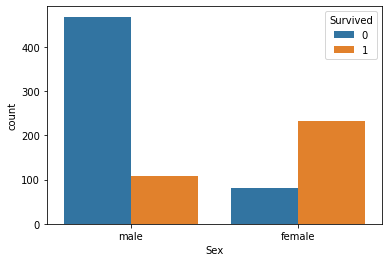

In [0]:
sns.countplot(train_df['Sex'], hue=train_df['Survived'])
display(train_df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().round(3))

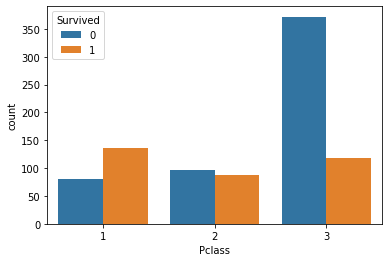

In [0]:
sns.countplot(train_df['Pclass'], hue=train_df['Survived'])


In [0]:
train_df[["Pclass", "Survived"]].groupby(['Pclass'], as_index=False).mean().round(3)


,Pclass,Survived
0,1,0.630
1,2,0.473
2,3,0.242


# 3. Create Model 

In [0]:
from keras.models import Sequential
from keras.layers import Dense,Dropout

In [0]:
model = Sequential()

In [0]:
model.add(Dense(units=1000, 
                input_dim=10, 
                kernel_initializer='normal', 
                activation='relu'))

In [0]:
model.add(Dropout(0.5))

In [0]:
model.add(Dense(units=500, 
                kernel_initializer='normal', 
                activation='relu'))

In [0]:
model.add(Dropout(0.5))

In [0]:
model.add(Dense(units=200, 
                kernel_initializer='normal', 
                activation='relu'))
model.add(Dropout(0.5))

In [0]:
model.add(Dense(units=100, 
                kernel_initializer='normal', 
                activation='sigmoid'))
model.add(Dropout(0.5))

In [0]:
model.add(Dense(units=50, 
                kernel_initializer='normal', 
                activation='sigmoid'))
model.add(Dropout(0.5))

In [0]:
model.add(Dense(units=1, 
                kernel_initializer='normal', 
                activation='sigmoid'))

# 4. Train model

In [0]:
model.compile(loss='binary_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

In [0]:
train_history =model.fit(x=train_Features, 
                         y=train_Label, 
                         validation_split=0.1, 
                         epochs=20, 
                         batch_size=40,verbose=2)

Train on 801 samples, validate on 90 samples
Epoch 1/20
 - 3s - loss: 0.6774 - acc: 0.5743 - val_loss: 0.6547 - val_acc: 0.6222
Epoch 2/20
 - 0s - loss: 0.6578 - acc: 0.6155 - val_loss: 0.6417 - val_acc: 0.6222
Epoch 3/20
 - 0s - loss: 0.6371 - acc: 0.6317 - val_loss: 0.6118 - val_acc: 0.6222
Epoch 4/20
 - 0s - loss: 0.5943 - acc: 0.7004 - val_loss: 0.5566 - val_acc: 0.7667
Epoch 5/20
 - 0s - loss: 0.5538 - acc: 0.7653 - val_loss: 0.5367 - val_acc: 0.7778
Epoch 6/20
 - 0s - loss: 0.5261 - acc: 0.7790 - val_loss: 0.5259 - val_acc: 0.7667
Epoch 7/20
 - 0s - loss: 0.5045 - acc: 0.8102 - val_loss: 0.4895 - val_acc: 0.8111
Epoch 8/20
 - 0s - loss: 0.5262 - acc: 0.7903 - val_loss: 0.5111 - val_acc: 0.7889
Epoch 9/20
 - 0s - loss: 0.4981 - acc: 0.7990 - val_loss: 0.5067 - val_acc: 0.7889
Epoch 10/20
 - 0s - loss: 0.5000 - acc: 0.8015 - val_loss: 0.4846 - val_acc: 0.8000
Epoch 11/20
 - 0s - loss: 0.5025 - acc: 0.7928 - val_loss: 0.4980 - val_acc: 0.8111
Epoch 12/20
 - 0s - loss: 0.4818 - acc: 

In [0]:
scores = model.evaluate(x=train_Features, 
                        y=train_Label)

891/891 [==============================] - 0s 86us/step


In [0]:
scores[1]

0.8125701454352048

# 6. Print History

In [0]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='lower right')
    plt.show()

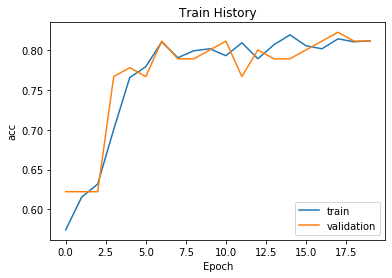

In [0]:
show_train_history(train_history,'acc','val_acc')

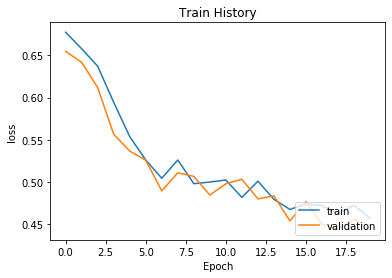

In [0]:
show_train_history(train_history,'loss','val_loss')

In [0]:
all_probability=model.predict(test_Features)

In [0]:
all_probability[:10]

array([[0.16248414],
       [0.340468  ],
       [0.16265535],
       [0.16245672],
       [0.35422137],
       [0.16247383],
       [0.88228995],
       [0.16284806],
       [0.4985974 ],
       [0.16244659]], dtype=float32)

In [0]:
pd=test_df
pd.insert(len(test_df.columns),
          'probability',all_probability)

In [0]:
pd[2:]

,PassengerId,Name,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,probability
2,894,"Myles, Mr. Thomas Francis",2,male,62.0,0,0,9.6875,Q,0.162655
3,895,"Wirz, Mr. Albert",3,male,27.0,0,0,8.6625,S,0.162457
4,896,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",3,female,22.0,1,1,12.2875,S,0.354221
5,897,"Svensson, Mr. Johan Cervin",3,male,14.0,0,0,9.2250,S,0.162474
6,898,"Connolly, Miss. Kate",3,female,30.0,0,0,7.6292,Q,0.882290
...,...,...,...,...,...,...,...,...,...,...
413,1305,"Spector, Mr. Woolf",3,male,NaN,0,0,8.0500,S,0.162756
414,1306,"Oliva y Ocana, Dona. Fermina",1,female,39.0,0,0,108.9000,C,0.892933
415,1307,"Saether, Mr. Simon Sivertsen",3,male,38.5,0,0,7.2500,S,0.162723
416,1308,"Ware, Mr. Frederick",3,male,NaN,0,0,8.0500,S,0.162766


In [0]:
test_result=pd.drop(['Name','Pclass','Age','Sex','SibSp','Parch','Embarked','probability','Fare'], axis=1)

In [0]:
test_probability=model.predict(test_Features)

In [0]:
test_probability[:2]

array([[0.16248414],
       [0.340468  ]], dtype=float32)

In [0]:
from sklearn.preprocessing import Binarizer
binarizer=Binarizer(0.5)
test_predict_result=binarizer.fit_transform(test_probability)
test_predict_result=test_predict_result.astype(numpy.int32)
test_predict_result[:10]

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0]], dtype=int32)

In [0]:
test_result.insert(len(test_result.columns),
          'Survived',test_predict_result)

In [0]:
test_result

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [0]:
test_result.to_csv("result.csv",index=False)

In [0]:
from google.colab import files
files.download('result.csv')